In [38]:
import os
import glob
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [39]:
train_path = '/Users/shambokarar/Desktop/Personal Study/Portfolio Projects/Groceries-Image-Recognition/train'
test_path = '/Users/shambokarar/Desktop/Personal Study/Portfolio Projects/Groceries-Image-Recognition/test'
validation_path = '/Users/shambokarar/Desktop/Personal Study/Portfolio Projects/Groceries-Image-Recognition/validation'

In [40]:
# Function to count the number of images in each class
def count_images_per_class(folder_path):
    classes = os.listdir(folder_path)
    class_counts = {}

    for class_name in classes:
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            class_count = len(glob.glob(os.path.join(class_folder, '*.jpg')))  
            class_counts[class_name] = class_count

    return class_counts

# Count images in training set
train_class_counts = count_images_per_class(train_path)
print("Training Set Class Distribution:")
print(train_class_counts)

# Count images in validation set
validation_class_counts = count_images_per_class(validation_path)
print("\nValidation Set Class Distribution:")
print(validation_class_counts)

# Count images in test set
test_class_counts = count_images_per_class(test_path)
print("\nTest Set Class Distribution:")
print(test_class_counts)

Training Set Class Distribution:
{'apple': 58, 'turnip': 85, 'chilli pepper': 76, 'raddish': 70, 'bell pepper': 78, 'pear': 76, 'sweetpotato': 69, 'pomegranate': 74, 'peas': 90, 'capsicum': 80, 'spinach': 87, 'lettuce': 87, 'kiwi': 82, 'lemon': 64, 'onion': 80, 'cauliflower': 71, 'potato': 66, 'jalepeno': 79, 'sweetcorn': 83, 'cucumber': 78, 'paprika': 74, 'watermelon': 79, 'mango': 77, 'cabbage': 84, 'grapes': 85, 'beetroot': 84, 'eggplant': 77, 'corn': 84, 'soy beans': 92, 'banana': 62, 'ginger': 64, 'garlic': 83, 'pineapple': 84, 'tomato': 84, 'orange': 61, 'carrot': 73}

Validation Set Class Distribution:
{'apple': 9, 'turnip': 10, 'chilli pepper': 7, 'raddish': 8, 'bell pepper': 9, 'pear': 10, 'sweetpotato': 10, 'pomegranate': 10, 'peas': 9, 'capsicum': 9, 'spinach': 10, 'lettuce': 9, 'kiwi': 10, 'lemon': 7, 'onion': 9, 'cauliflower': 9, 'potato': 9, 'jalepeno': 9, 'sweetcorn': 10, 'cucumber': 10, 'paprika': 10, 'watermelon': 10, 'mango': 10, 'cabbage': 10, 'grapes': 8, 'beetroot'

In [13]:
img_width, img_height = 224, 224

In [41]:
train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalize pixel values to be between 0 and 1
    shear_range=0.2,       # random application of shearing
    zoom_range=0.2,        # random zooming
    horizontal_flip=True   # random horizontal flipping
)

In [42]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
# Flow images from the directory and apply data augmentation (for training set)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'  # for multiple classes
)

Found 3115 images belonging to 36 classes.


In [44]:
# Flow images from the directory (for test set)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 359 images belonging to 36 classes.


In [45]:
# Flow images from the directory (for validation set)
validation_generator = test_datagen.flow_from_directory(
    validation_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 351 images belonging to 36 classes.


In [46]:
# Step 2: Build a Convolutional Neural Network (CNN) Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and input shape
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a 2D max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another 2D max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model.add(Flatten())

# Add a densely connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 36 neurons (for 36 classes) and softmax activation
model.add(Dense(36, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [47]:
epochs = 10

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Epoch 1/10


/Users/shambokarar/miniforge3/envs/groceries/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/98 [===>..........................] - ETA: 51s - loss: 20.6129 - accuracy: 0.0208

KeyboardInterrupt: 

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an augmented data generator
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Example: rotation augmentation
    width_shift_range=0.2,  # Example: width shift augmentation
    height_shift_range=0.2  # Example: height shift augmentation
)

# Flow augmented images from the directory and apply data augmentation (for training set)
augmented_train_generator = augmented_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


Found 3115 images belonging to 36 classes.


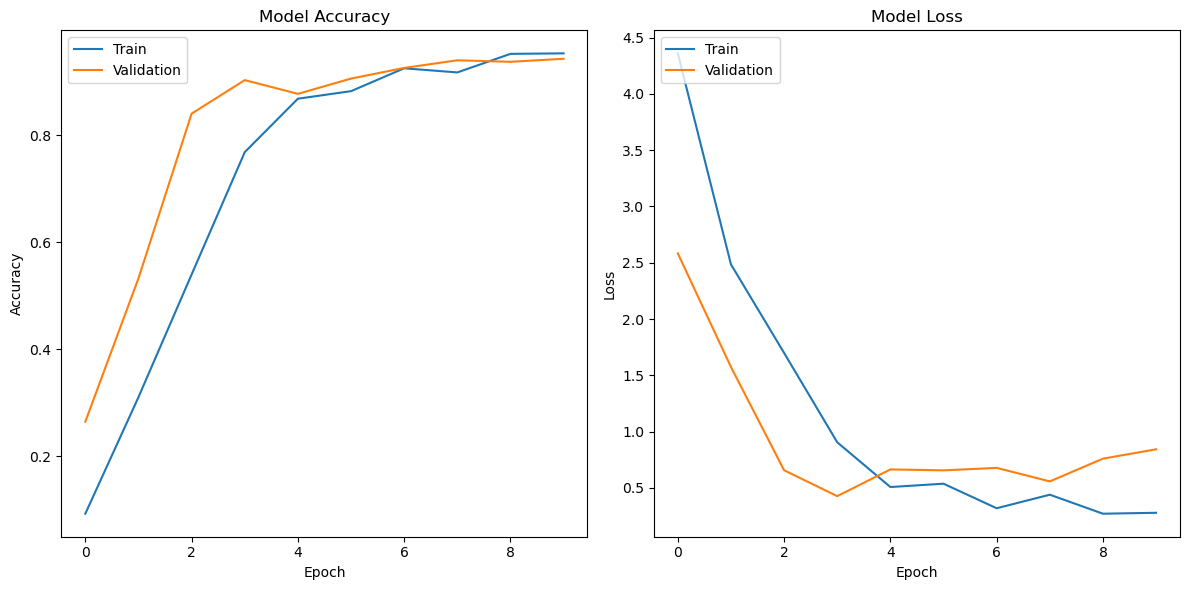

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [29]:
from sklearn.metrics import classification_report

# Generate predictions for the validation set
predictions = model.predict(validation_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert validation set labels to class indices
true_labels = validation_generator.classes

# Define class labels
class_labels = list(validation_generator.class_indices.keys())

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

print("Classification Report:\n", report)

11/11 [==============================] - 9s 798ms/step
Classification Report:
                precision    recall  f1-score   support

        apple       0.17      0.10      0.12        10
       banana       0.00      0.00      0.00         9
     beetroot       0.00      0.00      0.00        10
  bell pepper       0.08      0.11      0.10         9
      cabbage       0.10      0.10      0.10        10
     capsicum       0.14      0.10      0.12        10
       carrot       0.00      0.00      0.00         9
  cauliflower       0.10      0.10      0.10        10
chilli pepper       0.08      0.11      0.09         9
         corn       0.08      0.10      0.09        10
     cucumber       0.00      0.00      0.00        10
     eggplant       0.09      0.10      0.10        10
       garlic       0.09      0.10      0.10        10
       ginger       0.12      0.10      0.11        10
       grapes       0.11      0.11      0.11         9
     jalepeno       0.00      0.00      

11/11 [==============================] - 9s 809ms/step


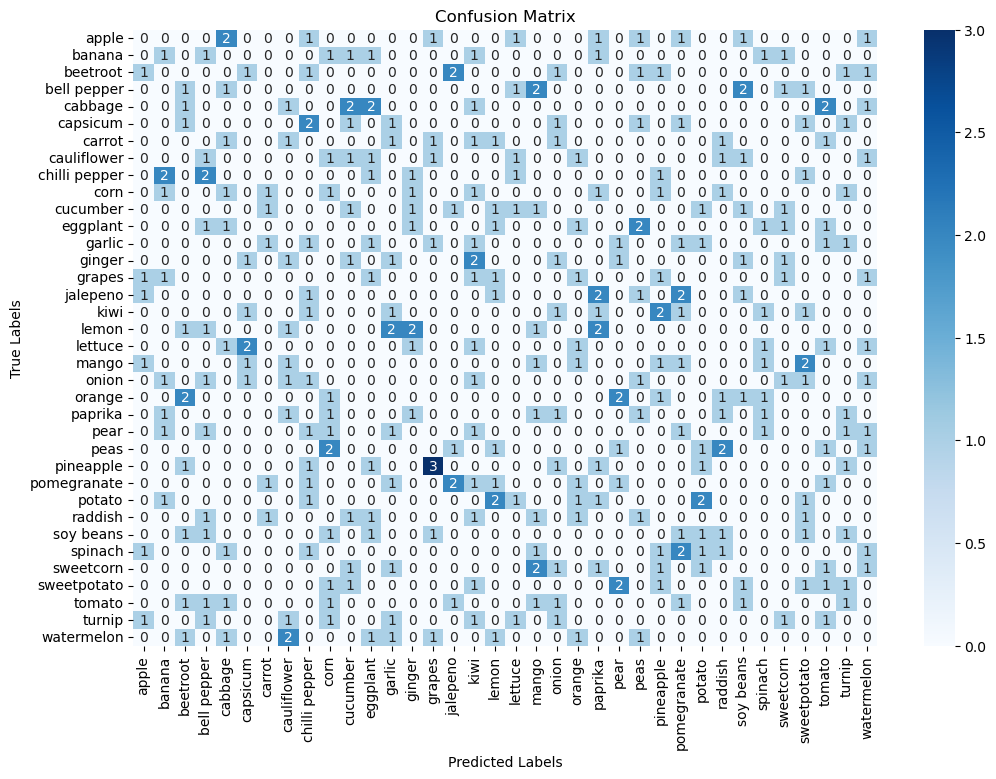

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions for the validation set
predictions = model.predict(validation_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert validation set labels to class indices
true_labels = validation_generator.classes

# Define class labels
class_labels = list(validation_generator.class_indices.keys())

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
